In [1]:
### Configuring Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install git+https://github.com/renatopp/liac-arff.git  ## For arff library

  Cloning https://github.com/renatopp/liac-arff.git to /tmp/pip-req-build-xeun3gbe
  Running command git clone -q https://github.com/renatopp/liac-arff.git /tmp/pip-req-build-xeun3gbe
  Created wheel for liac-arff: filename=liac_arff-2.5.0-cp37-none-any.whl size=13152 sha256=f54d39b6a39ada3651413b33596e0a38c5e81741b44d124cdc1f3baae4398619
  Stored in directory: /tmp/pip-ephem-wheel-cache-nea9053z/wheels/6b/9e/fa/455a4a2cc9292f085b0528570de839da0a9378ffda4c2c050c
Successfully built liac-arff


## Leitura dos dados

In [3]:
import arff, numpy as np

path_dt = "/content/drive/My Drive/Mestrado/Aprendizado de Máquina/Datasets/ARFF" 

nameFiles_challenges = ["challenges_dataset_preprocessed", "challenges_dataset_preprocessed_PCA", "challenges_dataset_preprocessed_informationGain",
             "challenges_dataset_preprocessed_sample_70", "challenges_dataset_preprocessed_sample_80", "challenges_dataset_preprocessed_sample_90"]

nameFiles_recommendations = ["recommendations_dataset_preprocessed", "recommendations_dataset_preprocessed_PCA", "recommendations_dataset_preprocessed_informationGain",
             "recommendations_dataset_preprocessed_sample_70", "recommendations_dataset_preprocessed_sample_80", "recommendations_dataset_preprocessed_sample_90"]


datasets_challenges = {}  ## First place contains the files without classes
                          ## Second place contains only the classes

datasets_recommendations = {}  ## First place contains the files without classes
                          ## Second place contains only the classes
        
def nameDataset(nameFile):
  if (nameFile in ["challenges_dataset_preprocessed", "recommendations_dataset_preprocessed"]):
    return 'base_normal'
  elif (nameFile in ["challenges_dataset_preprocessed_PCA", "recommendations_dataset_preprocessed_PCA"]):
    return 'base_PCA'
  elif (nameFile in ["challenges_dataset_preprocessed_informationGain", "recommendations_dataset_preprocessed_informationGain"]):
    return 'base_InfoGain'
  elif (nameFile in ["challenges_dataset_preprocessed_sample_70", "recommendations_dataset_preprocessed_sample_70"]):
    return 'base_amostra_70'
  elif (nameFile in ["challenges_dataset_preprocessed_sample_80", "recommendations_dataset_preprocessed_sample_80" ]):
    return 'base_amostra_80'
  else:
    return 'base_amostra_90'

  


                          
### Looping by challenges files
for nameFile in nameFiles_challenges:
  dt = arff.loads(open(f'{path_dt}/{nameFile}.arff', 'rt'))
  dt = np.array(dt['data'])
  
  dt_without_class = dt[:, :-1].astype(float) 
  originalLabels = dt[:, -1]

  datasets_challenges[nameDataset(nameFile)] = (dt_without_class, originalLabels)

###### Printing results

print('Challenges files found:{')
for i in datasets_challenges:
  print('  ' + i)
print('}\n')



### Looping by recommendations files
for nameFile in nameFiles_recommendations:
  dt = arff.loads(open(f'{path_dt}/{nameFile}.arff', 'rt'))
  dt = np.array(dt['data'])
  
  dt_without_class = dt[:, :-1].astype(float) 
  originalLabels = dt[:, -1]

  datasets_recommendations[nameDataset(nameFile)] = (dt_without_class, originalLabels)

###### Printing results

print('Recommendations files found:{')
for i in datasets_recommendations:
  print('  ' + i)
print('}')

Challenges files found:{
  base_normal
  base_PCA
  base_InfoGain
  base_amostra_70
  base_amostra_80
  base_amostra_90
}

Recommendations files found:{
  base_normal
  base_PCA
  base_InfoGain
  base_amostra_70
  base_amostra_80
  base_amostra_90
}


## Algoritmos de _clustering_

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score

kmeansResults_challenges = {
	'file_name': [],
	'number_of_class': [],
	'seed': [],
	'db': [],
	'cr': []
}

hierarchicalResults_challenges = {
	'file_name': [],
	'number_of_class': [],
	'db': [],
	'cr': []
}


kmeansResults_recommendations = {
	'file_name': [],
	'number_of_class': [],
	'seed': [],
	'db': [],
	'cr': []
}

hierarchicalResults_recommendations = {
	'file_name': [],
	'number_of_class': [],
	'db': [],
	'cr': []
}

### K-means algorithm execution

datasets = datasets_challenges
for dataset in ['challenges', 'recommendations']:
  
  if (dataset == 'recommendations'):
    datasets = datasets_recommendations
  
  for nameFile in datasets:
    for numberOfClass in range(2, 21):  ## [2, 3, ..., 19, 20]
      for seed in range(5, 30, 5):  ## [5, 10, 15, 20, 25]

        dt_without_class = datasets[nameFile][0]
        originalLabels = datasets[nameFile][1]

        ### K-MEANS
        kmeans = KMeans(n_clusters=numberOfClass, random_state=seed).fit(dt_without_class)
        kmeansLabels = kmeans.labels_
        
        db_kmeans = davies_bouldin_score(dt_without_class, kmeansLabels) ## Davies-Bouldin
        cr_kmeans = adjusted_rand_score(originalLabels, kmeansLabels)    ## Adjusted rand index

        if (dataset == 'challenges'):        
          kmeansResults_challenges['file_name'].append(nameFile)
          kmeansResults_challenges['number_of_class'].append(numberOfClass)
          kmeansResults_challenges['seed'].append(seed)
          kmeansResults_challenges['db'].append(db_kmeans)
          kmeansResults_challenges['cr'].append(cr_kmeans)
        else:
          kmeansResults_recommendations['file_name'].append(nameFile)
          kmeansResults_recommendations['number_of_class'].append(numberOfClass)
          kmeansResults_recommendations['seed'].append(seed)
          kmeansResults_recommendations['db'].append(db_kmeans)
          kmeansResults_recommendations['cr'].append(cr_kmeans)
      
      

### Hierarchical algorithm execution
datasets = datasets_challenges
for dataset in ['challenges', 'recommendations']:
  
  if (dataset == 'recommendations'):
    datasets = datasets_recommendations
  
  for nameFile in datasets:
    for numberOfClass in range(2, 21):  ## [2, 3, ..., 19, 20]

        dt_without_class = datasets[nameFile][0]
        originalLabels = datasets[nameFile][1]

        ## HIERARCHICAL
        hierarchical = AgglomerativeClustering(n_clusters=numberOfClass, linkage='average').fit(dt_without_class)
        hierarchicalLabels = hierarchical.labels_
        
        db_hierarchical = davies_bouldin_score(dt_without_class, hierarchicalLabels)
        cr_hierarchical = adjusted_rand_score(originalLabels, hierarchicalLabels)


        if (dataset == 'challenges'):
          hierarchicalResults_challenges['file_name'].append(nameFile)
          hierarchicalResults_challenges['number_of_class'].append(numberOfClass)
          hierarchicalResults_challenges['db'].append(db_hierarchical)
          hierarchicalResults_challenges['cr'].append(cr_hierarchical)
        else:
          hierarchicalResults_recommendations['file_name'].append(nameFile)
          hierarchicalResults_recommendations['number_of_class'].append(numberOfClass)
          hierarchicalResults_recommendations['db'].append(db_hierarchical)
          hierarchicalResults_recommendations['cr'].append(cr_hierarchical)
        


In [5]:
import pandas as pd

df_kmeans_challenges = pd.DataFrame(kmeansResults_challenges)
print(f'{df_kmeans_challenges}\n\n')

df_kmeans_recommendations = pd.DataFrame(kmeansResults_recommendations)
print(f'{df_kmeans_recommendations}\n\n')

df_hierarchical_challenges = pd.DataFrame(hierarchicalResults_challenges)
print(f'{df_hierarchical_challenges}\n\n')

df_hierarchical_recommendations = pd.DataFrame(hierarchicalResults_recommendations)
print(f'{df_hierarchical_recommendations}\n\n')

           file_name  number_of_class  seed        db        cr
0        base_normal                2     5  5.296590  0.016194
1        base_normal                2    10  3.083406  0.010507
2        base_normal                2    15  3.083406  0.010507
3        base_normal                2    20  4.198881  0.024769
4        base_normal                2    25  3.302291  0.008947
..               ...              ...   ...       ...       ...
565  base_amostra_90               20     5  1.365055  0.131715
566  base_amostra_90               20    10  1.499625  0.150492
567  base_amostra_90               20    15  1.489698  0.125862
568  base_amostra_90               20    20  1.494983  0.165086
569  base_amostra_90               20    25  1.527092  0.158375

[570 rows x 5 columns]


           file_name  number_of_class  seed        db        cr
0        base_normal                2     5  6.520144 -0.023434
1        base_normal                2    10  7.094719 -0.005530
2        base_

## Plotagem dos gráficos

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(16.7,8.27)})

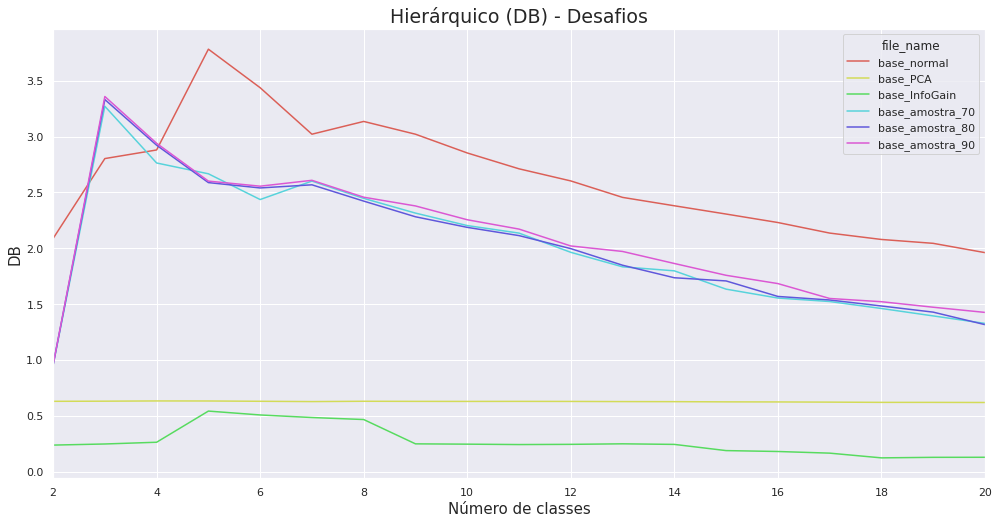

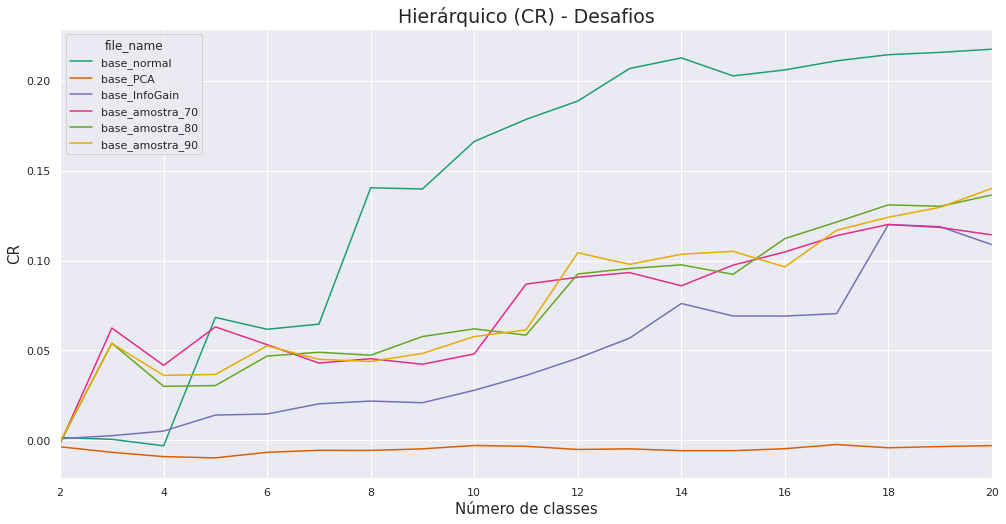

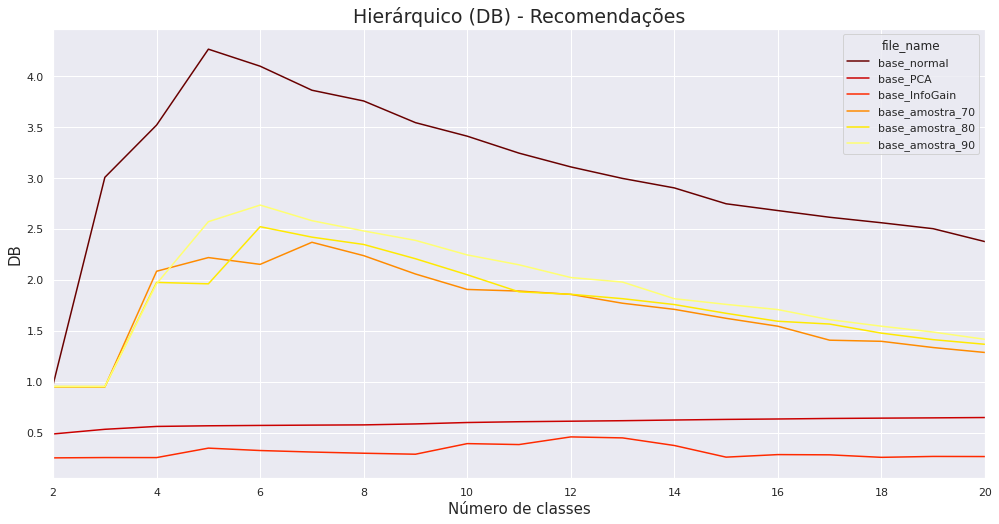

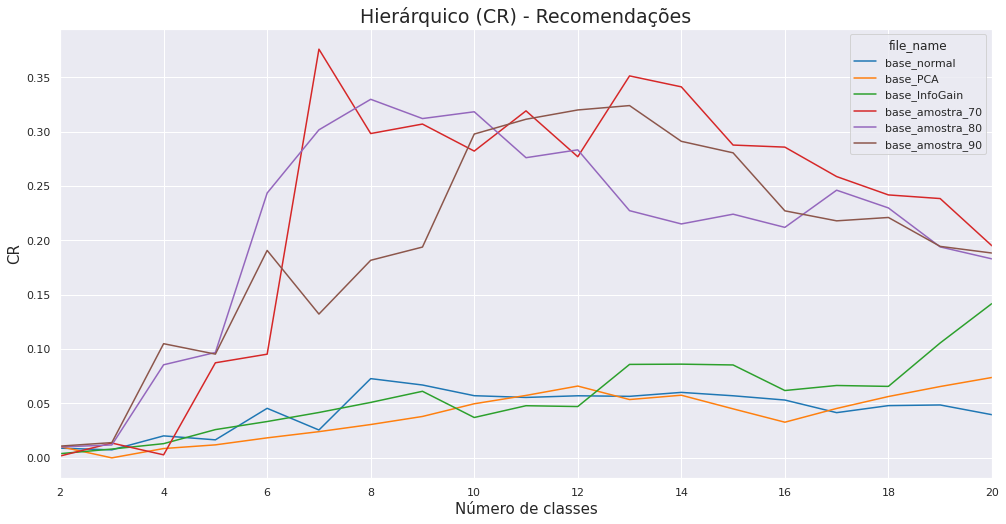

In [7]:
######### HIERARCHICAL

### CHALLENGES
sns.lineplot(x = "number_of_class", y = "db", data = df_hierarchical_challenges, hue = "file_name",
            style = "file_name", palette = "hls", dashes = False)
 
plt.title("Hierárquico (DB) - Desafios", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("DB", fontsize = 15)
plt.xlim([2.0,20.0])
plt.show()

print("\n\n\n\n")

sns.lineplot(x = "number_of_class", y = "cr", data = df_hierarchical_challenges, hue = "file_name",
            style = "file_name", palette = "Dark2", dashes = False)
 
plt.title("Hierárquico (CR) - Desafios", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("CR", fontsize = 15) 
plt.xlim([2.0,20.0])
plt.show()

print("\n\n\n\n")
### RECOMMENDATIONS


sns.lineplot(x = "number_of_class", y = "db", data = df_hierarchical_recommendations, hue = "file_name",
            style = "file_name", palette = "hot", dashes = False)
 
plt.title("Hierárquico (DB) - Recomendações", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("DB", fontsize = 15)
plt.xlim([2.0,20.0])
plt.show()

print("\n\n\n\n")


sns.lineplot(x = "number_of_class", y = "cr", data = df_hierarchical_recommendations, hue = "file_name",
            style = "file_name", palette = "tab10", dashes = False)
 
plt.title("Hierárquico (CR) - Recomendações", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("CR", fontsize = 15) 
plt.xlim([2.0,20.0])
plt.show()

In [8]:
df_kmeans_challenges

,file_name,number_of_class,seed,db,cr
0,base_normal,2,5,5.296590,0.016194
1,base_normal,2,10,3.083406,0.010507
2,base_normal,2,15,3.083406,0.010507
3,base_normal,2,20,4.198881,0.024769
4,base_normal,2,25,3.302291,0.008947
...,...,...,...,...,...
565,base_amostra_90,20,5,1.365055,0.131715
566,base_amostra_90,20,10,1.499625,0.150492
567,base_amostra_90,20,15,1.489698,0.125862
568,base_amostra_90,20,20,1.494983,0.165086


In [9]:
df_kmeans_challenges_mean = df_kmeans_challenges.groupby(['file_name', 'number_of_class']).mean()[["db", "cr"]]
df_kmeans_recommendations_mean = df_kmeans_recommendations.groupby(['file_name', 'number_of_class']).mean()[["db", "cr"]]
df_kmeans_recommendations_mean.reset_index()

,file_name,number_of_class,db,cr
0,base_InfoGain,2,0.668073,0.005777
1,base_InfoGain,3,0.718354,0.007921
2,base_InfoGain,4,0.712239,0.008688
3,base_InfoGain,5,0.792332,0.008682
4,base_InfoGain,6,0.991926,0.041742
...,...,...,...,...
109,base_normal,16,2.784456,0.040725
110,base_normal,17,2.650494,0.047259
111,base_normal,18,2.608587,0.027970
112,base_normal,19,2.535432,0.023569


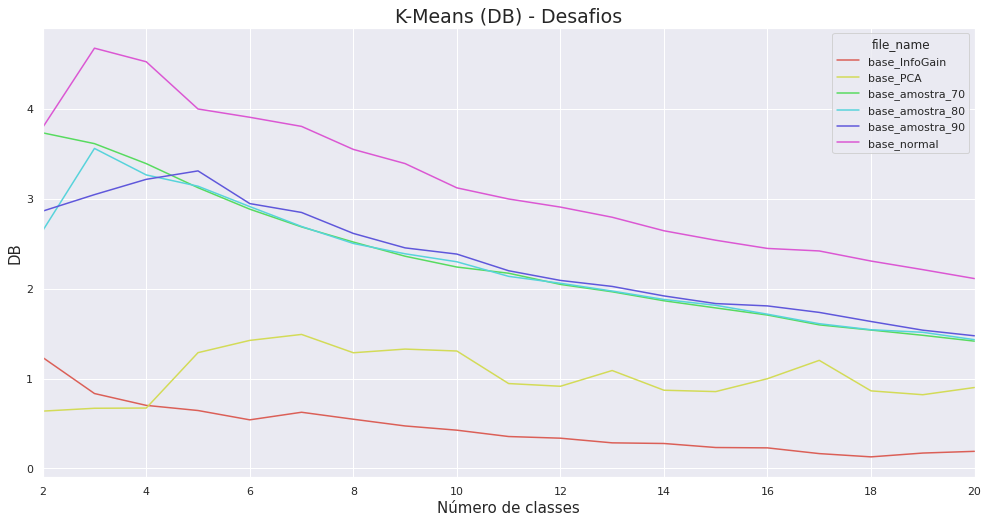

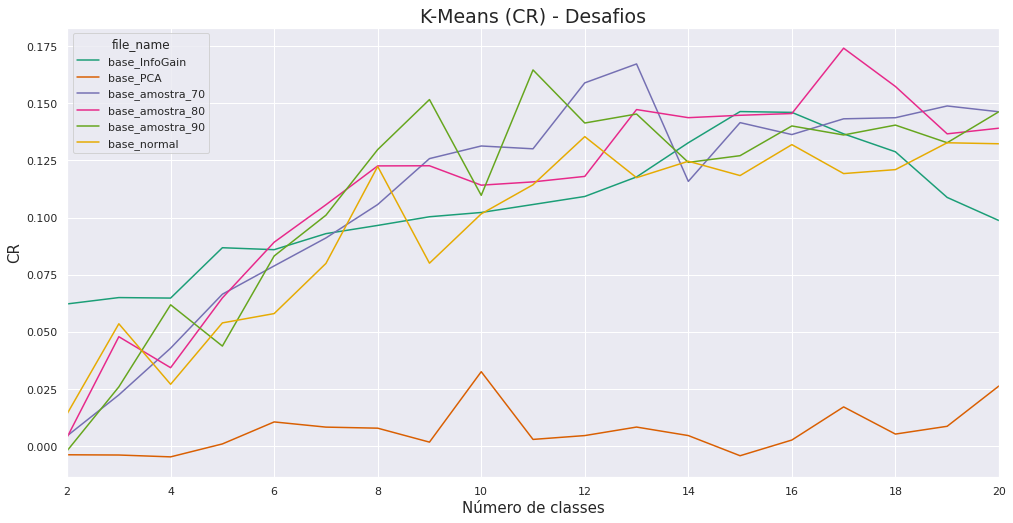

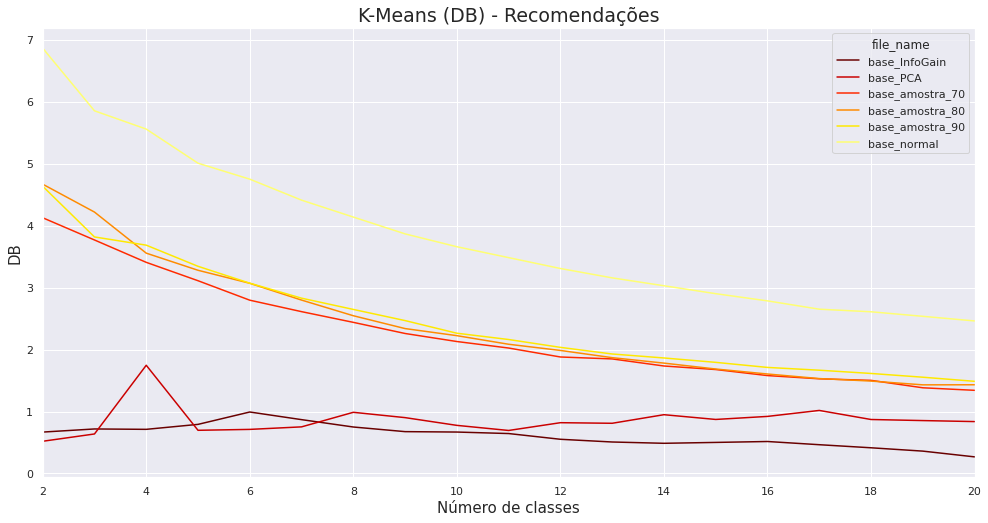

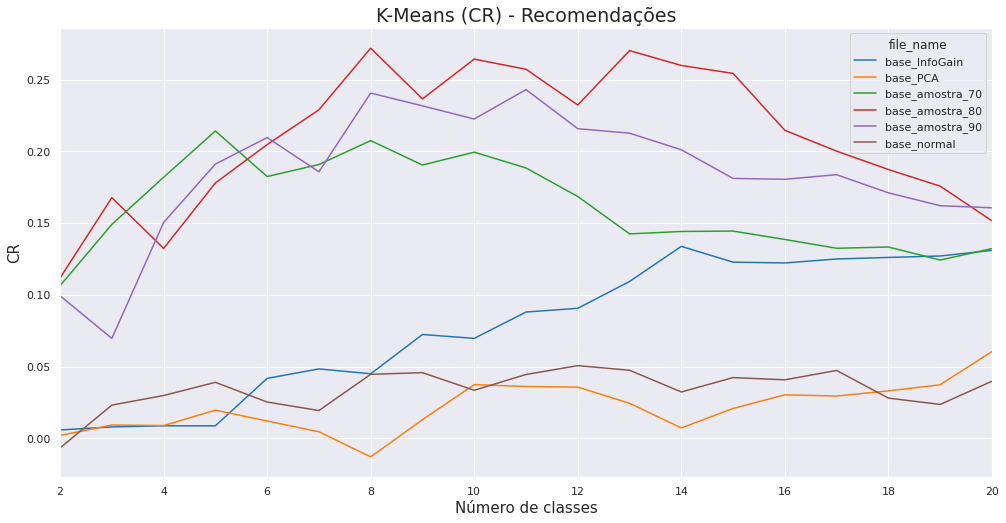

In [10]:
df_kmeans_challenges_mean = df_kmeans_challenges.groupby(['file_name', 'number_of_class']).mean()[["db", "cr"]]
df_kmeans_challenges_mean.reset_index(inplace=True)

df_kmeans_recommendations_mean = df_kmeans_recommendations.groupby(['file_name', 'number_of_class']).mean()[["db", "cr"]]
df_kmeans_recommendations_mean.reset_index(inplace=True)

######### K-MEANS

### CHALLENGES

sns.lineplot(x = "number_of_class", y = "db", data = df_kmeans_challenges_mean, hue = "file_name",
            style = "file_name", palette = "hls", dashes = False)
 
plt.title("K-Means (DB) - Desafios", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("DB", fontsize = 15)
plt.xlim([2.0,20.0])
plt.show()

print("\n\n\n\n")


sns.lineplot(x = "number_of_class", y = "cr", data = df_kmeans_challenges_mean, hue = "file_name",
            style = "file_name", palette = "Dark2", dashes = False)
 
plt.title("K-Means (CR) - Desafios", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("CR", fontsize = 15) 
plt.xlim([2.0,20.0])
plt.show()

print("\n\n\n\n")
### RECOMMENDATIONS


sns.lineplot(x = "number_of_class", y = "db", data = df_kmeans_recommendations_mean, hue = "file_name",
            style = "file_name", palette = "hot", dashes = False)
 
plt.title("K-Means (DB) - Recomendações", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("DB", fontsize = 15)
plt.xlim([2.0,20.0])
plt.show()

print("\n\n\n\n")


sns.lineplot(x = "number_of_class", y = "cr", data = df_kmeans_recommendations_mean, hue = "file_name",
            style = "file_name", palette = "tab10", dashes = False)
 
plt.title("K-Means (CR) - Recomendações", fontsize = 19)
plt.xlabel("Número de classes", fontsize = 15)
plt.ylabel("CR", fontsize = 15) 
plt.xlim([2.0,20.0])
plt.show()

  



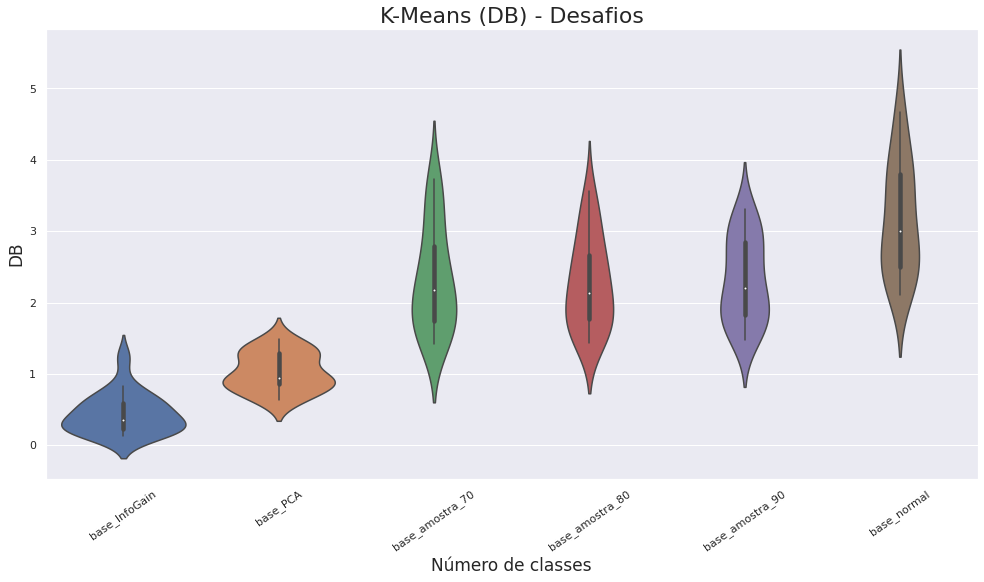

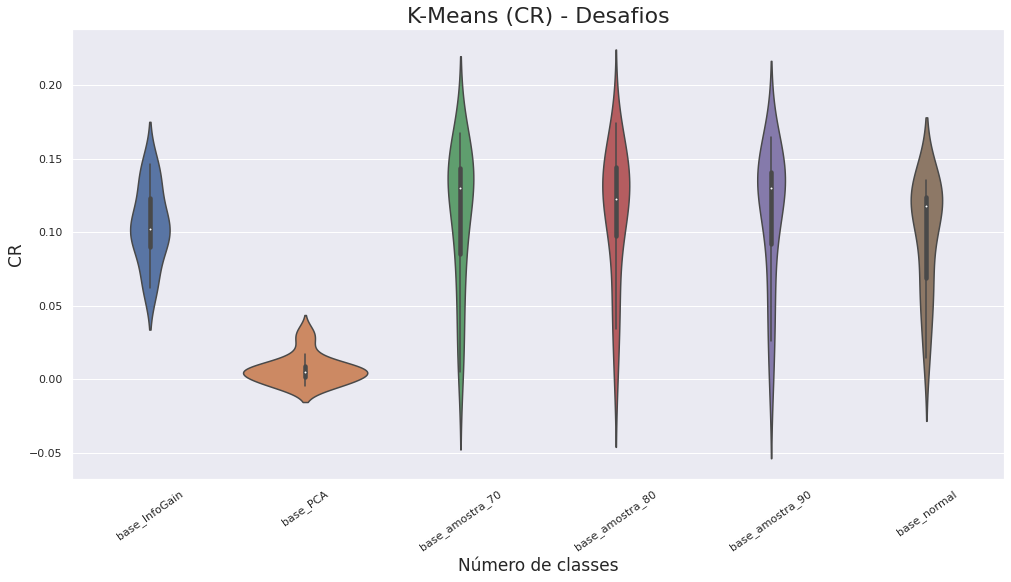

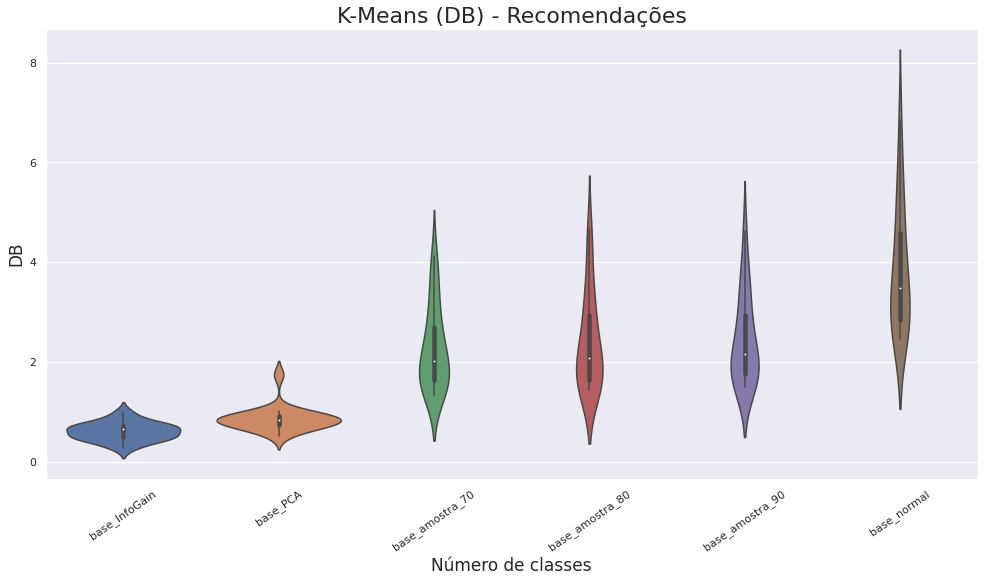

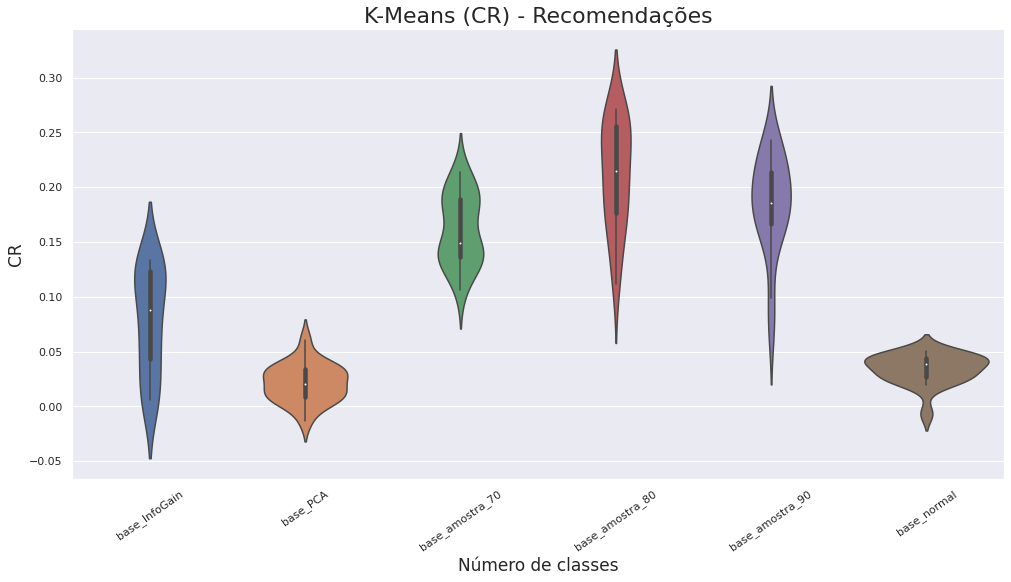

In [11]:
####### K-Means

## Challenges

sns.violinplot(x='file_name', y='db', data=df_kmeans_challenges_mean)
plt.xticks(rotation='35')
plt.title("K-Means (DB) - Desafios", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("DB", fontsize = 17) 
plt.show()

print("\n\n\n\n")

sns.violinplot(x='file_name', y='cr', data=df_kmeans_challenges_mean)
plt.xticks(rotation='35')
plt.title("K-Means (CR) - Desafios", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("CR", fontsize = 17) 
plt.show()

print("\n\n\n\n")
## Recommendations

sns.violinplot(x='file_name', y='db', data=df_kmeans_recommendations_mean)
plt.xticks(rotation='35')
plt.title("K-Means (DB) - Recomendações", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("DB", fontsize = 17) 
plt.show()

print("\n\n\n\n")

sns.violinplot(x='file_name', y='cr', data=df_kmeans_recommendations_mean)
plt.xticks(rotation='35')
plt.title("K-Means (CR) - Recomendações", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("CR", fontsize = 17) 
plt.show()


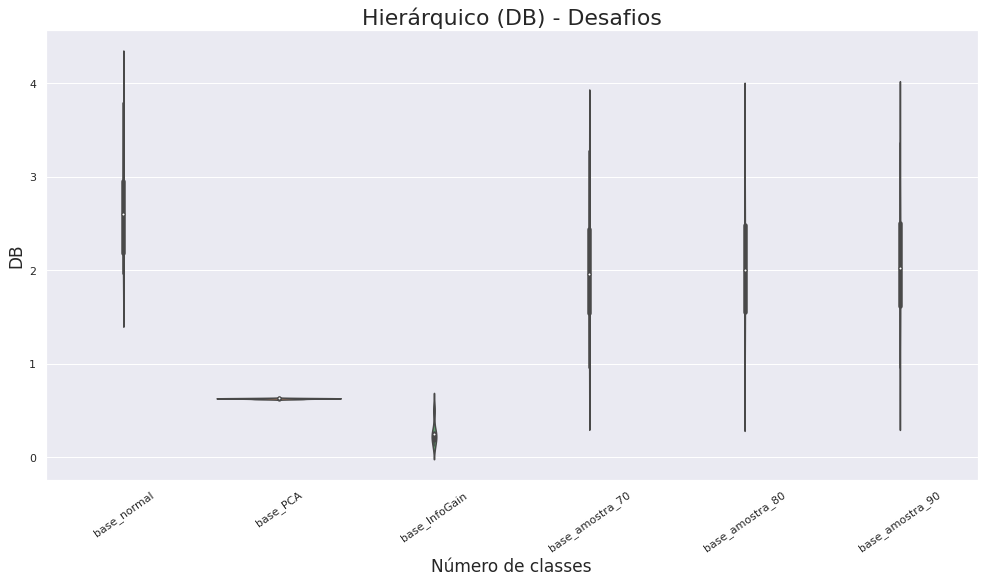

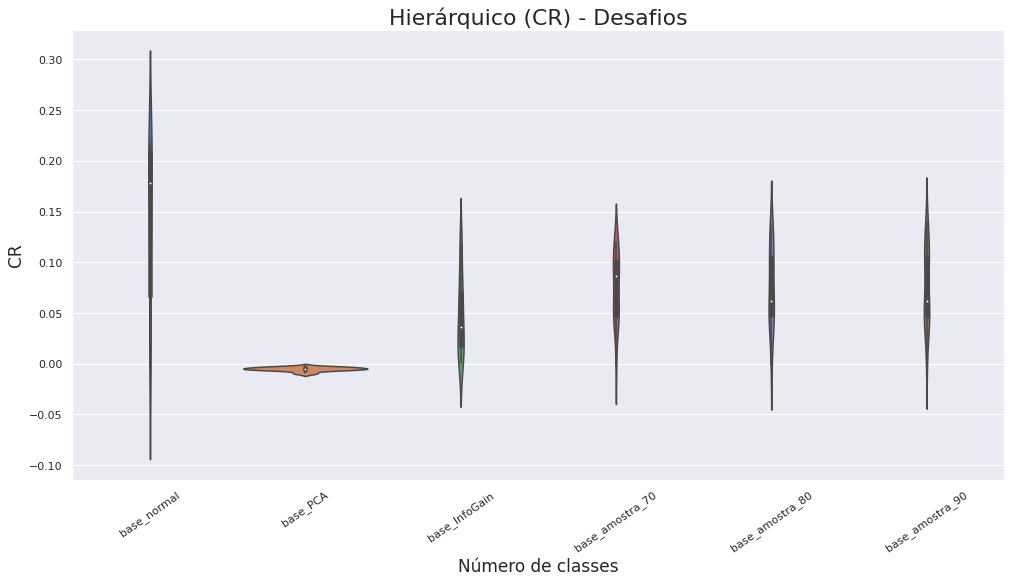

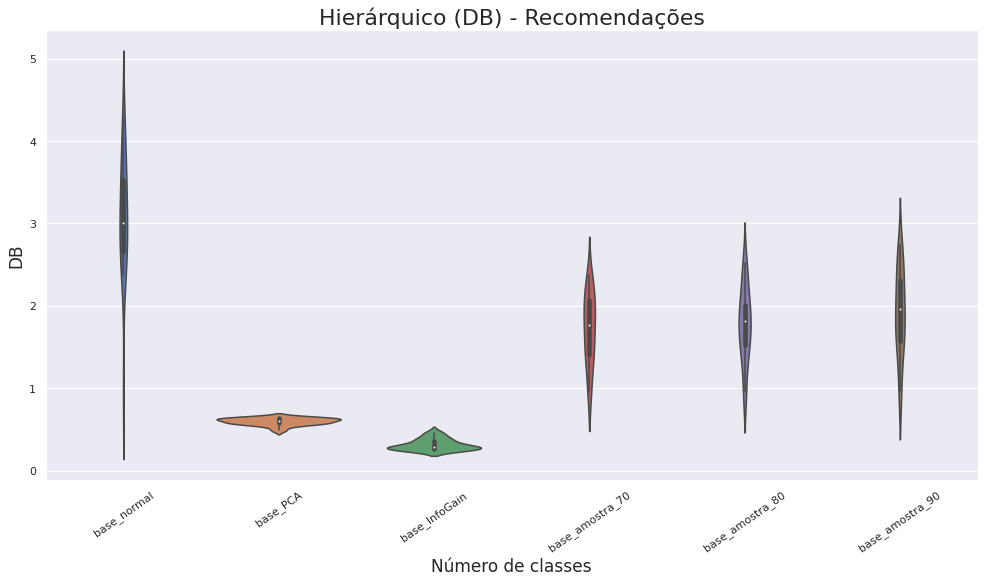

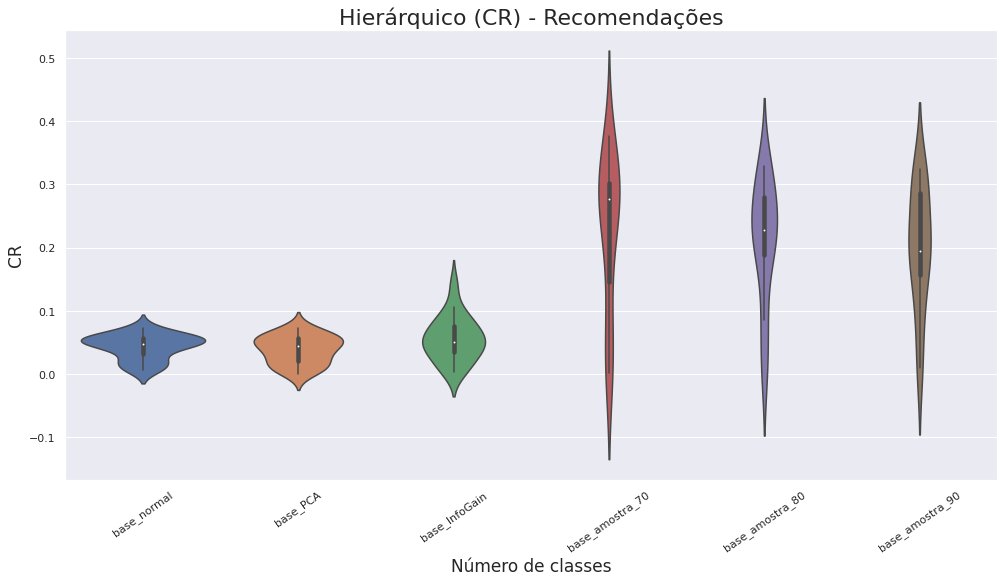

In [12]:
####### Hierarchical

## Challenges

sns.violinplot(x='file_name', y='db', data=df_hierarchical_challenges)
plt.xticks(rotation='35')
plt.title("Hierárquico (DB) - Desafios", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("DB", fontsize = 17) 
plt.show()

print("\n\n\n\n")

sns.violinplot(x='file_name', y='cr', data=df_hierarchical_challenges)
plt.xticks(rotation='35')
plt.title("Hierárquico (CR) - Desafios", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("CR", fontsize = 17) 
plt.show()

print("\n\n\n\n")
## Recommendations

sns.violinplot(x='file_name', y='db', data=df_hierarchical_recommendations)
plt.xticks(rotation='35')
plt.title("Hierárquico (DB) - Recomendações", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("DB", fontsize = 17) 
plt.show()

print("\n\n\n\n")

sns.violinplot(x='file_name', y='cr', data=df_hierarchical_recommendations)
plt.xticks(rotation='35')
plt.title("Hierárquico (CR) - Recomendações", fontsize = 22)
plt.xlabel("Número de classes", fontsize = 17)
plt.ylabel("CR", fontsize = 17) 
plt.show()


### K-means vs Hieráquico


In [13]:
import sys
print(sys.version)

3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
